## Waste Management using CNN Model

In [1]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [2]:
# pip install tensorflow

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [9]:
train_path="dataset/TRAIN"
test_path="dataset/TEST"

In [11]:
#Importing Libraries
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Activation, Dropout, Flatten, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import to_categorical, plot_model
from glob import glob


In [36]:
# visualization
from cv2 import cvtColor

x_data = []
y_data = []
for category in glob.glob(train_path+'/*'):
    for file in tqdm(glob.glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
        data = pd.DataFrame({'image':x_data,'label':y_data})

100%|██████████| 6926/6926 [02:17<00:00, 50.33it/s]


In [37]:
data.shape

(19491, 2)

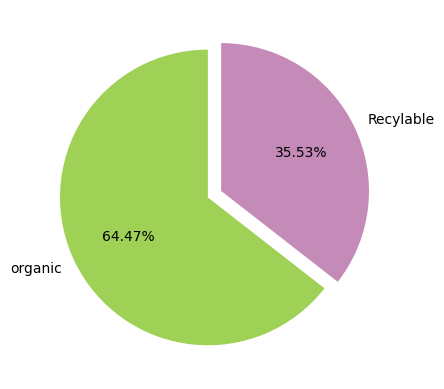

In [43]:
colors = ['#a0d157', '#c48bb8']
plt.pie(data.label.value_counts(), labels=['organic','Recylable'], autopct='%0.2f%%', colors = colors, startangle=90, explode=[0.05,0.05])
plt.show()